This is my first project

The Dataset I will be using:
https://archive.ics.uci.edu/dataset/320/student+performance

Target:Predict a Student's Performance based on the dataset


In [1]:
#Libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score 
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE=55

In [2]:
data=pd.read_csv(r"D:\ML(imp)\NOtes and projecTS\student\student-mat.csv",delimiter=';')
#d2=pd.read_csv(r"D:\ML(imp)\NOtes and projecTS\student\student-por.csv")


In [3]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [4]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Sperating target variables

In [5]:
X = data[['G1', 'G2']]  #First Model
x=data.drop('G3',axis=1) #Second Model:x to check how the model works with other features
x=pd.get_dummies(x)#One Hot encoding for the categorical variables
y=data['G3']

In [6]:
print(len(y))
print(len(X))

395
395


Now we split the datset using train_test_split from the scikit learn library

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)

In [8]:
print(len(y_train))
print(len(X_train))
#print(data.dtypes)

316
316


Now we use our linear regression model:

In [9]:
model=LinearRegression()
model.fit(X_train,y_train) #Model training

LinearRegression()

In [10]:
y_pred=model.predict(X_test)#Predictions of our models for the given test set X_test

In [11]:
y_pred_arr=np.array(y_pred)
print(y_pred_arr)#Array of predictions by our model for test set X_test

[15.13294589 12.25728473 15.4971338  13.0337445   3.31419729  6.96631821
 11.89309682  6.3719524  10.9345431  10.9345431  11.89309682 14.58666402
  8.65324775 13.99229822  5.04921077  8.28905984 12.25728473 11.89309682
 11.71100287 11.71100287 17.41424124 19.69553659 15.13294589 14.95085193
  6.3719524  10.38826123 14.53858008 17.5963352  13.99229822 15.13294589
  8.28905984 14.17439217 16.45568752 15.13294589  7.69469404 12.85165054
  9.0655196  14.17439217  7.92487193  6.18985845 12.07519078  8.65324775
 13.81020426 10.20616728 15.31503985  9.24761356  6.55404636  6.18985845
  7.51260008  9.79389543 16.45568752 11.11663706 13.0337445   9.79389543
 15.13294589 11.89309682 10.38826123 10.75244915  6.00776449  9.0655196
 18.37279496  7.33050612  9.61180147  8.10696588  8.28905984 12.62147265
  9.24761356 16.27359356 -1.06629945  8.88342565 15.4971338  11.89309682
  9.24761356 14.95085193  9.97598938 14.35648613 17.41424124 14.95085193
 12.85165054]


In [12]:
y_arr=np.array(y_test)
print(y_arr)#Corresponding values for X_test

[16 12 16 13  0  8 11  8 11 11 11 15  0 15  8 10 13 12 11 13 18 19 16 15
  6 12 15 17 14 15 10 14 16 16  9 12 11 13  8  0 12  0 15 11 14 11  6  6
  8 10 15 11 14 11 15 11 11 10  0 10 18  9  0  8  8 13 12 15  0 10 16 12
 10 15 11 14 17 15 13]


Now we check the accuracy of the prediction

In [13]:
error=mse(y_pred,y_test)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"The mean square error is:{error}")
print(f"The r2_score is :{r2}")

The mean square error is:5.030797956905453
The r2_score is :0.7564597420955094


In [15]:
#Now using x after applying one hot encoding and seeing how our model works
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=RANDOM_STATE)
model2=LinearRegression()
model2.fit(x_train,y_train)#Training of second model

LinearRegression()

In [16]:
y_pred2=model2.predict(x_test)
y_pred2_arr=np.array(y_pred2)
print(y_pred2_arr)

[13.70025635 11.46670532 15.51589966 13.71377563  2.53378296  6.99563599
 11.77664185  5.98352051 11.09664917 11.1506958  12.22622681 14.70828247
  6.76782227 14.26242065  5.29959106  8.03393555 12.30526733 12.00015259
 11.03735352 11.30731201 17.75680542 20.22839355 15.10397339 15.48171997
  6.82443237 10.51348877 15.40591431 18.13748169 14.91174316 13.21176147
  8.15927124 13.89749146 17.99490356 15.3430481   8.10195923 12.57546997
  8.18881226 13.49331665  6.84176636  6.43511963 12.34069824  8.13034058
 13.69360352 10.24325562 16.30609131  8.98556519  7.30615234  7.07168579
  7.69689941 10.58456421 15.78775024 11.71118164 11.91845703 10.72338867
 15.55654907 12.03741455  9.8359375  10.28079224  6.24395752  8.16616821
 18.83435059  6.4883728   8.58670044  7.54992676  8.89025879 12.34991455
  9.24230957 16.01953125 -2.19467163  9.07299805 13.81314087 12.51849365
 10.31912231 15.77008057  9.70159912 13.91949463 17.21786499 14.22396851
 13.32598877]


In [17]:
error2=mse(y_test,y_pred2)
r22 = r2_score(y_test, y_pred2)

In [18]:
print(f"The mean square error is:{error2}")
print(f"The r2_score is :{r22}")

The mean square error is:4.9145831284290065
The r2_score is :0.7620856864371283


In [19]:
print(f"The mean squared error with first model:{error}")
print(f"The mean squared error with second model:{error2}")

The mean squared error with first model:5.030797956905453
The mean squared error with second model:4.9145831284290065


Plotting our data:
Model 1:X
We use matplotlib #Seaborn

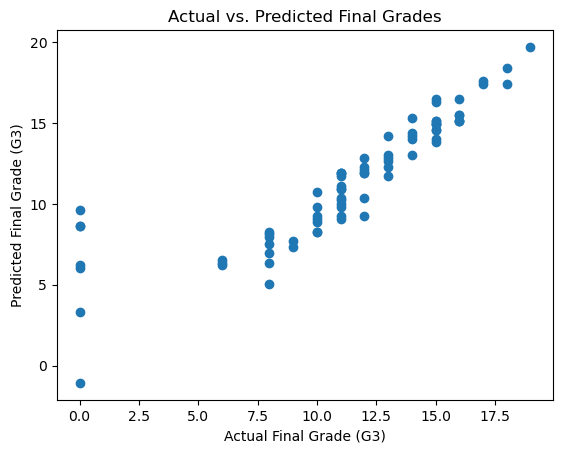

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs. Predicted Final Grades")
plt.show()

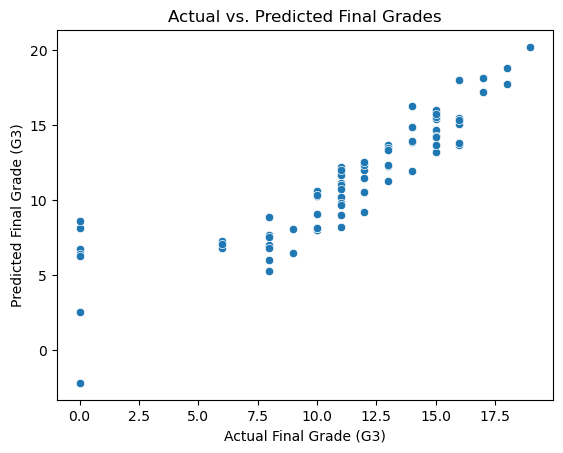

In [21]:
sns.scatterplot(x=y_test, y=y_pred2,)
plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs. Predicted Final Grades")
plt.show()